In [1]:
# Set the seed value for the notebook so the results are reproducible
from numpy.random import seed
seed(1)

In [2]:
# Dependencies
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from matplotlib import pyplot

In [3]:
import tensorflow
tensorflow.keras.__version__

'2.4.0'

In [4]:
# read csv
weather = pd.read_csv('WeatherDataPull/dataLargerSet.csv')
weather.head()

,Unnamed: 0,index,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,0,6,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,1,7,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,2,8,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,3,9,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,4,10,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [5]:
# drop unnecessary columns
weatherClean=weather.drop(["Unnamed: 0", "index"], axis=1)
weatherClean.head()

,winery,vintage,points,cities,MarchLowTemp,MarchHighTemp,MarchAvgTemp,MarchPrecip,MarchCloudiness,MarchHumidity,...,JulyAvgTemp,JulyPrecip,JulyCloudiness,JulyHumidity,AugLowTemp,AugHighTemp,AugAvgTemp,AugPrecip,AugCloudiness,AugHumidity
0,Claiborne & Churchill,2009,88,San Luis Obispo,42.129032,68.419355,58.580645,1.5,12.870968,61.387097,...,82.935484,0.0,2.612903,41.612903,56.741935,89.129032,79.903226,0.1,4.419355,44.000000
1,Claiborne & Churchill,2011,87,San Luis Obispo,43.806452,62.161290,55.258065,9.4,35.032258,76.903226,...,72.193548,0.1,1.838710,62.000000,61.741935,79.161290,73.806452,0.0,2.548387,57.000000
2,Claiborne & Churchill,2013,94,San Luis Obispo,47.354839,68.548387,60.516129,1.2,21.387097,61.677419,...,73.129032,0.2,5.322581,61.354839,61.290323,80.000000,73.806452,0.0,2.516129,59.806452
3,Claiborne & Churchill,2014,93,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194
4,Claiborne & Churchill,2014,91,San Luis Obispo,48.612903,68.322581,61.129032,1.8,22.290323,64.258065,...,74.677419,0.3,10.032258,63.612903,62.096774,80.290323,73.967742,0.0,2.612903,63.774194


In [6]:
# Data Pre-Processing

In [7]:
weatherClean.columns

Index(['winery', 'vintage', 'points', 'cities', 'MarchLowTemp',
       'MarchHighTemp', 'MarchAvgTemp', 'MarchPrecip', 'MarchCloudiness',
       'MarchHumidity', 'AprilLowTemp', 'AprilHighTemp', 'AprilAvgTemp',
       'AprilPrecip', 'AprilCloudiness', 'AprilHumidity', 'MayLowTemp',
       'MayHighTemp', 'MayAvgTemp', 'MayPrecip', 'MayCloudiness',
       'MayHumidity', 'JuneLowTemp', 'JuneHighTemp', 'JuneAvgTemp',
       'JunePrecip', 'JuneCloudiness', 'JuneHumidity', 'JulyLowTemp',
       'JulyHighTemp', 'JulyAvgTemp', 'JulyPrecip', 'JulyCloudiness',
       'JulyHumidity', 'AugLowTemp', 'AugHighTemp', 'AugAvgTemp', 'AugPrecip',
       'AugCloudiness', 'AugHumidity'],
      dtype='object')

In [8]:
# drop columns not needed for MLR
weatherCleandf = weatherClean.drop(['winery', 'vintage', 'cities'], axis=1)

In [9]:
# Given the set of values for features, we have to predict the quality of wine. 
# Find correlation of each feature with our target variable 'points'

correlations = weatherCleandf.corr()['points'].drop('points')
print(correlations)

MarchLowTemp       0.017426
MarchHighTemp     -0.017353
MarchAvgTemp      -0.005979
MarchPrecip       -0.046759
MarchCloudiness    0.036910
MarchHumidity     -0.014875
AprilLowTemp       0.057485
AprilHighTemp      0.013467
AprilAvgTemp       0.027138
AprilPrecip       -0.003042
AprilCloudiness   -0.022679
AprilHumidity      0.037504
MayLowTemp         0.046140
MayHighTemp       -0.009394
MayAvgTemp         0.001652
MayPrecip         -0.047806
MayCloudiness     -0.044780
MayHumidity        0.038937
JuneLowTemp        0.067235
JuneHighTemp      -0.017018
JuneAvgTemp        0.004488
JunePrecip         0.022076
JuneCloudiness    -0.031466
JuneHumidity       0.064528
JulyLowTemp        0.077308
JulyHighTemp      -0.121021
JulyAvgTemp       -0.101566
JulyPrecip         0.029619
JulyCloudiness     0.113703
JulyHumidity       0.204394
AugLowTemp         0.069809
AugHighTemp       -0.106148
AugAvgTemp        -0.085107
AugPrecip          0.017319
AugCloudiness      0.085782
AugHumidity        0

In [10]:
# X holds all above 36 variables
X = weatherCleandf.drop(['points'], axis=1)
y = weatherCleandf['points']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)

In [12]:
print(y_test)

1201    91
115     88
979     87
175     90
63      92
        ..
1264    88
638     87
626     98
1008    87
178     88
Name: points, Length: 332, dtype: int64


In [13]:
# Fit linear regression to training data
model = LinearRegression()
model.fit(X_train,y_train)
  
# This gives the coefficients of the features selected above.  
print(model.coef_)

[ 0.0112544  -0.31298564  0.28229405 -0.07754194  0.07387968 -0.02346797
 -0.1471012   0.26355588 -0.23667838  0.336883   -0.14744862 -0.01184211
  0.05611167  0.54564715 -0.57557608  0.01909432 -0.04354888  0.04306396
  0.05925278 -0.18309157  0.22337334  0.05335572  0.01619866 -0.09929931
  0.14023425 -0.83484123  0.71087745 -0.14488863  0.04045201  0.02756834
 -0.04949425  0.55114409 -0.49372479 -0.29563695  0.0548113   0.07194059]


Feature: 0, Score: 0.01125
Feature: 1, Score: -0.31299
Feature: 2, Score: 0.28229
Feature: 3, Score: -0.07754
Feature: 4, Score: 0.07388
Feature: 5, Score: -0.02347
Feature: 6, Score: -0.14710
Feature: 7, Score: 0.26356
Feature: 8, Score: -0.23668
Feature: 9, Score: 0.33688
Feature: 10, Score: -0.14745
Feature: 11, Score: -0.01184
Feature: 12, Score: 0.05611
Feature: 13, Score: 0.54565
Feature: 14, Score: -0.57558
Feature: 15, Score: 0.01909
Feature: 16, Score: -0.04355
Feature: 17, Score: 0.04306
Feature: 18, Score: 0.05925
Feature: 19, Score: -0.18309
Feature: 20, Score: 0.22337
Feature: 21, Score: 0.05336
Feature: 22, Score: 0.01620
Feature: 23, Score: -0.09930
Feature: 24, Score: 0.14023
Feature: 25, Score: -0.83484
Feature: 26, Score: 0.71088
Feature: 27, Score: -0.14489
Feature: 28, Score: 0.04045
Feature: 29, Score: 0.02757
Feature: 30, Score: -0.04949
Feature: 31, Score: 0.55114
Feature: 32, Score: -0.49372
Feature: 33, Score: -0.29564
Feature: 34, Score: 0.05481
Feature: 35, S

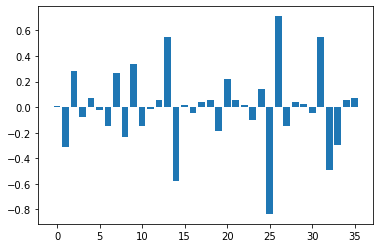

In [14]:
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [15]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.14193383841574658
Testing Score: 0.06345840375944434


Text(0.5, 1.0, 'Residual Plot')

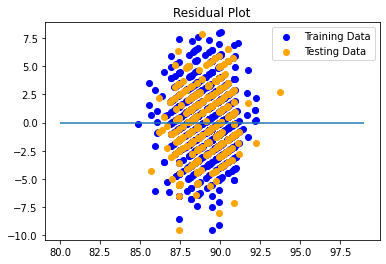

In [16]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [17]:
train_pred = model.predict(X_train)
print(train_pred)
test_pred = model.predict(X_test) 
print(test_pred)

[89.60961062 88.66453445 85.90937776 88.2393444  89.48043356 90.86620317
 89.79162664 89.71144802 87.71239258 90.89993256 89.71144802 87.79487434
 88.331486   89.300803   89.27607321 90.19808328 89.95872511 87.45157259
 89.96080301 90.13837507 88.15917382 88.55780671 87.99026255 89.27607321
 90.89993256 88.57153596 88.55780671 88.59598742 90.79386914 88.55780671
 89.30254215 90.03569464 88.62033101 91.66670921 88.55780671 89.09066326
 87.45157259 90.10601628 88.62033101 89.34490378 88.72360661 89.22137943
 90.20537471 89.96653956 90.89993256 88.78190833 90.2209605  89.8674482
 90.71165745 88.15917382 87.45157259 90.86620317 89.1833496  88.23648582
 88.24793741 89.31494301 89.99880543 90.07350745 91.66670921 87.16602473
 90.71165745 90.50299765 87.45157259 89.4879405  87.02212417 88.62033101
 87.96306123 89.95872511 86.94454288 90.06315089 90.89993256 89.76820958
 87.45615867 88.17163947 89.95228904 87.45157259 89.4879405  89.47147577
 89.4879405  86.94454288 89.93303089 91.71134173 86.